In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use('science')

In [4]:
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] += r"\usepackage{mathrsfs}"

In [8]:
# Separate the data into two groups (e.g., first 100 entries in group 1, next 100 in group 2)
data1 = [9.2749, 12.8774, 13.9990, 8.6831, 13.2038, 10.6205, 8.3698, 11.7890, 11.6962, 15.0356, 9.6890,
    12.3208, 10.7124, 10.4130, 10.4325, 11.8101, 8.8321, 11.2264, 11.5381, 11.0482, 11.0926, 10.9788,
    10.8440, 9.3056, 12.1007, 10.0464, 9.3908, 10.8036, 10.1829, 8.8277, 11.2869, 11.5304, 9.0853,
    13.3596, 11.3735, 9.9728, 11.9804, 12.5380, 9.5096, 8.6928, 10.6480, 8.5282, 11.8094, 8.9270,
    9.5881, 10.5869, 11.9455, 12.0050, 13.8277, 13.3755, 9.6413, 11.8532, 10.9306, 11.3800, 9.3696,
    13.7358, 11.0277, 11.4798, 9.4283, 10.6625, 11.0148, 12.4921, 9.1058, 11.0991, 9.9230, 13.9276,
    11.9987, 10.9617, 14.3892, 11.4451, 14.7601, 9.3229, 16.8845, 8.7143, 12.2032, 12.2203, 12.2885,
    11.5610, 8.4663, 15.7138, 9.6682, 16.0770, 8.7462, 9.4989, 11.4349, 11.5339, 9.6012, 9.0895,
    13.3057, 13.2283, 9.4720, 13.7018, 12.2451, 11.7301, 11.9097, 10.3219, 13.2917, 10.1481, 9.2378,
    9.4709, 9.4080, 10.9689, 13.5942, 14.0493, 14.6194, 12.0034, 11.0761, 14.7465, 10.9478, 10.8977,
    13.1049, 10.0714, 14.2639, 10.5454, 7.8913, 10.0650, 10.2385, 9.5416, 10.7355, 13.5702, 10.3491,
    7.9089, 11.2511, 10.5670, 13.0267, 16.5196, 8.9718, 10.7576, 11.3309, 13.2254, 10.8722, 12.7559,
    12.0269, 12.6335, 11.5982, 13.0122, 12.9078, 9.8155, 10.0418, 12.1887, 8.7785, 14.9408, 10.0714,
    11.8300, 12.7706, 11.8810, 13.8907, 11.8331, 11.0300, 13.5229, 12.0800, 11.0441, 9.1896, 11.6855,
    11.8093, 11.4624, 9.3030, 12.1545, 15.1044, 11.6498, 11.9891, 9.8088, 11.8317, 11.1257, 11.0657,
    10.5889, 10.0536, 11.4402, 11.4159, 12.6924, 9.9115, 10.3623, 10.5876, 7.3951, 8.6052, 10.8416,
    12.5367, 10.7551, 10.1579, 15.1716, 14.0864, 11.3408, 10.8362, 10.6121, 15.2219, 11.9564, 11.9125,
    13.5395, 10.0598, 8.5909, 9.1430, 12.3291, 11.5488, 9.5864, 11.8961, 11.2238, 12.9556, 11.6302,
    9.8415, 8.4433]
data2 = [25.9311, 32.3542, 31.1287, 22.5002, 26.8779, 24.2236, 27.8993, 34.4534, 27.7307, 24.8210,
    27.2904, 13.8296, 22.2515, 21.2644, 16.7158, 24.1764, 24.5929, 26.9469, 37.2525, 17.2219,
    18.6094, 26.4078, 27.5299, 15.7115, 31.9673, 20.0018, 22.0591, 22.4169, 26.1035, 17.5794,
    26.7537, 28.7519, 22.0590, 27.8573, 26.0335, 28.1793, 32.1740, 29.2882, 22.4376, 18.6055,
    23.7228, 27.1123, 28.3865, 21.9640, 29.3212, 31.4764, 30.4055, 27.2291, 17.9730, 29.0402,
    29.5860, 27.8388, 26.7571, 35.0494, 24.4763, 24.1007, 23.2330, 24.4341, 22.0806, 25.4439,
    19.1607, 29.0969, 22.4826, 20.0988, 19.3986, 28.2778, 19.5510, 19.5713, 21.4374, 28.4484,
    27.9030, 21.3209, 27.0732, 17.6060, 33.2512, 30.7428, 35.1385, 28.9302, 16.0047, 44.6733,
    27.1170, 34.4015, 20.3194, 21.6353, 21.1821, 30.7265, 26.8110, 21.9591, 32.4079, 21.2073,
    19.4128, 26.1089, 22.4821, 23.2501, 23.7542, 24.1111, 30.1602, 23.8592, 21.9153, 21.5192,
    15.4276, 30.0616, 34.6665, 30.1185, 22.0931, 27.0755, 26.4404, 38.7560, 26.2167, 27.3924,
    31.6975, 21.1556, 31.3024, 24.5365, 17.0565, 27.0362, 12.7929, 18.4376, 22.3818, 36.9610,
    20.6817, 18.3451, 23.5713, 24.6984, 28.0937, 26.0923, 21.8350, 21.4173, 27.3232, 26.2300,
    29.7847, 34.8311, 36.4589, 28.1506, 34.9622, 33.8808, 24.3233, 19.6547, 22.7408, 14.3725,
    23.8424, 28.9118, 17.5507, 25.5622, 27.7587, 23.8367, 30.9787, 26.5355, 25.9695, 31.5105,
    32.2712, 36.8392, 25.0150, 27.1809, 27.3869, 30.4318, 16.4429, 28.0038, 38.0622, 27.1865,
    28.5386, 22.6338, 29.0734, 23.9055, 26.2454, 17.5094, 20.1942, 16.5385, 24.7196, 28.9851,
    20.3587, 24.5400, 18.5761, 8.9855, 19.1897, 18.7645, 30.3691, 28.2145, 24.3866, 28.3322,
    26.3594, 22.2913, 21.1099, 21.7054, 40.2334, 25.9217, 36.5120, 30.7134, 23.0117, 17.3468,
    25.4843, 32.3051, 25.2447, 19.6801, 27.0762, 30.9299, 31.6385, 29.4644, 17.8052, 16.6509]

In [9]:
colors = [(0.114, 0.42, 0.659), (0, 153/250, 0)]

## Boxplot

In [45]:
import seaborn as sns

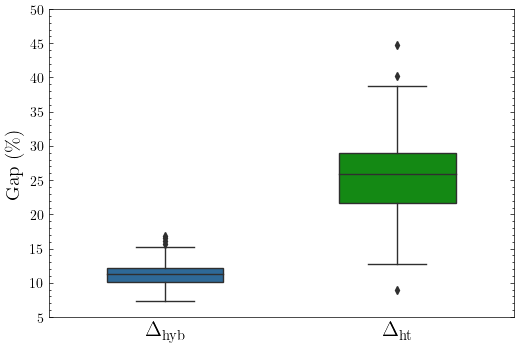

In [46]:
# Combine the datasets for boxplot
combined_data = [data1, data2]

labels = [r'$\Delta_{\text{hyb}}$', r'$\Delta_{\text{ht}}$']

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# bp = ax.boxplot(combined_data, patch_artist=True, labels=labels)
bp = sns.boxplot(data=combined_data, palette=colors, width=0.5, fliersize=4)

# # Set colors for boxes and medians
# for box, median, color in zip(bp['boxes'], bp['medians'], colors):
#     box.set_facecolor(color)
#     median.set_color('black')  # Change the color of the median line

# for flier in bp['fliers']:
#     flier.set_marker('D')  # Set marker style to diamond
#     flier.set_markersize(4)  # Set marker size
#     flier.set_markerfacecolor('black')     

ax.set_ylabel('Gap (\%)', fontsize=14)
ax.set_xticks([0, 1], labels, fontsize=15)
ax.set_ylim(5, 50)

# ax.minorticks_off()
# ax.majorticks_off()

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

fig.savefig('../figures/delta-boxplot.pdf', dpi=300) 

## Scatterplot

In [6]:
x_data = [
    20.6536, 17.8623, 17.5163, 19.4758, 17.9698, 18.1121, 19.1019, 22.4634, 17.3270, 17.3196, 16.7242, 17.2594, 19.2459, 18.8178, 19.1124, 18.6992, 21.1004, 19.1005, 16.7358, 17.6734, 18.6368, 19.4511, 19.5896, 19.4367, 19.8237, 19.6847, 19.1975, 19.1204, 18.1451, 18.5518, 18.2397, 19.3949, 18.1976, 19.5073, 18.1808, 19.7698, 21.0844, 17.9359, 18.2185, 18.6155, 18.2542, 21.4593, 19.3617, 18.4989, 20.0947, 19.2662, 20.6420, 18.9621, 18.5389, 18.7402, 19.6468, 19.1104, 17.6925, 19.2363, 17.9079, 18.4671, 17.7235, 18.2982, 19.7332, 19.7627, 17.6789, 17.9906, 17.9392, 19.0016, 19.4256, 17.9169, 16.8518, 19.2251, 15.5075, 18.0636, 16.8014, 18.9983, 17.9395, 17.3611, 18.5377, 16.5021, 19.5720, 19.3894, 18.7308, 19.2455, 18.6798, 17.1039, 20.0774, 20.8645, 18.5100, 18.5843, 19.2320, 19.7513, 18.0953, 17.3341, 18.7258, 17.0532, 17.8871, 17.7143, 19.9653, 19.7357, 18.6537, 18.2211, 19.7980, 17.8715, 19.3070, 19.7212, 17.9202, 18.3525, 16.9302, 18.4473, 18.3594, 19.0004, 17.5167, 17.2606, 18.9365, 18.8763, 17.7041, 16.9723, 17.9984, 18.8932, 19.4170, 19.1321, 18.1482, 17.6608, 19.8770, 21.6870, 17.8000, 19.0328, 17.2085, 17.0579, 17.2663, 20.4199, 18.6490, 18.2036, 19.8911, 22.1403, 19.7598, 20.5367, 20.3368, 18.3458, 16.9936, 18.1397, 18.3424, 17.4973, 19.8474, 17.4576, 19.8135, 19.3939, 17.6507, 18.2190, 17.2425, 15.2927, 18.0989, 17.8150, 18.1515, 19.1044, 19.1161, 18.1918, 18.8784, 18.7038, 18.3994, 17.1723, 19.0454, 21.0347, 19.0223, 18.9544, 19.5433, 18.6882, 17.1729, 17.3455, 19.6487, 18.8711, 17.6237, 18.5709, 19.6579, 18.5750, 18.5443, 17.7063, 20.4922, 16.4662, 17.9864, 20.7000, 18.0599, 17.7780, 17.4807, 18.8796, 18.0479, 16.8571, 19.2611, 19.2341, 19.1907, 18.8530, 18.3194, 18.8386, 20.4726, 20.1897, 18.3698, 18.7087, 19.0104, 19.2778, 19.7282, 18.9378, 19.3955, 18.7083
]

y_ht_data = [
    26.0093, 23.6415, 22.9689, 23.8579, 22.7997, 22.4995, 24.4312, 30.2028, 22.1319, 21.6185, 21.2883, 19.6463, 23.5284, 22.8193, 22.3072, 23.2200, 26.2896, 24.2475, 22.9703, 20.7171, 22.1050, 24.5877, 24.9826, 22.4905, 26.1608, 23.6220, 23.4323, 23.4066, 22.8816, 21.8131, 23.1195, 24.9713, 22.2118, 24.9415, 22.9139, 25.3408, 27.8681, 23.1890, 22.3063, 22.0790, 22.5846, 27.2774, 24.8578, 22.5620, 25.9867, 25.3305, 26.9183, 24.1253, 21.8709, 24.1824, 25.4595, 24.4305, 22.4265, 25.9785, 22.2911, 22.9178, 21.8412, 22.7692, 24.0904, 24.7911, 21.0663, 23.2253, 21.9724, 22.8207, 23.1939, 22.9834, 20.1465, 22.9877, 18.8319, 23.2024, 21.4895, 23.0489, 22.7963, 20.4177, 24.7017, 21.5753, 26.4493, 24.9988, 21.7286, 27.8431, 23.7452, 22.9879, 24.1570, 25.3786, 22.4308, 24.2946, 24.3883, 24.0885, 23.9596, 21.0102, 22.3610, 21.5056, 21.9085, 21.8329, 24.7079, 24.4942, 24.2797, 22.5685, 24.1368, 21.7173, 22.2856, 25.6497, 24.1325, 23.8800, 20.6706, 23.4420, 23.2137, 26.3642, 22.1090, 21.9887, 24.9389, 22.8697, 23.2459, 21.1367, 21.0683, 24.0012, 21.9010, 22.6596, 22.2101, 24.1884, 23.9879, 25.6655, 21.9957, 23.7336, 22.0430, 21.5087, 21.0364, 24.7933, 23.7445, 22.9784, 25.8156, 29.8520, 26.9640, 26.3179, 27.4470, 24.5615, 21.1270, 21.7050, 22.5136, 20.0121, 24.5795, 22.5049, 23.2909, 24.3514, 22.5503, 22.5618, 22.5840, 19.3507, 22.7991, 23.4286, 24.0092, 26.1423, 23.8980, 23.1365, 24.0486, 24.3957, 21.4248, 21.9812, 26.2945, 26.7533, 24.4510, 23.2445, 25.2252, 23.1557, 21.6800, 20.3826, 23.6166, 21.9921, 21.9802, 23.9537, 23.6600, 23.1333, 21.9891, 19.2973, 24.4246, 19.5560, 23.4487, 26.5404, 22.4641, 22.8149, 22.0885, 23.0881, 21.8578, 20.5160, 27.0105, 24.2199, 26.1976, 24.6434, 22.5350, 22.1065, 25.6899, 26.7120, 23.0072, 22.3906, 24.1577, 25.2404, 25.9699, 24.5177, 22.8489, 21.8234
]

y_hyb_data = [
22.5692, 20.1625, 19.9684, 21.1669, 20.3425, 20.0357, 20.7007, 25.1116, 19.3536, 19.9237, 18.3446, 19.3859, 21.3076, 20.7773, 21.1063, 20.9076, 22.9640, 21.2448, 18.6668, 19.6260, 20.7041, 21.5866, 21.7139, 21.2454, 22.2225, 21.6623, 21.0003, 21.1861, 19.9928, 20.1895, 20.2984, 21.6312, 19.8509, 22.1134, 20.2486, 21.7414, 23.6104, 20.1847, 19.9510, 20.2337, 20.1979, 23.2894, 21.6482, 20.1503, 22.0214, 21.3059, 23.1078, 21.2385, 21.1024, 21.2468, 21.5410, 21.3756, 19.6264, 21.4254, 19.5858, 21.0037, 19.6780, 20.3988, 21.5937, 21.8699, 19.6262, 20.2380, 19.5727, 21.1106, 21.3532, 20.4123, 18.8738, 21.3325, 17.7389, 20.1310, 19.2813, 20.7695, 20.9685, 18.8740, 20.7999, 18.5187, 21.9771, 21.6310, 20.3166, 22.2697, 20.4858, 19.8537, 21.8334, 22.8464, 20.6266, 20.7278, 21.0785, 21.5466, 20.5030, 19.6271, 20.4995, 19.3898, 20.0774, 19.7922, 22.3431, 21.7728, 21.1331, 20.0702, 21.6269, 19.5641, 21.1234, 21.8844, 20.3563, 20.9309, 19.4053, 20.6616, 20.3929, 21.8023, 19.4344, 19.1416, 21.4181, 20.7774, 20.2294, 18.7621, 19.4187, 20.7948, 21.4050, 20.9576, 20.0965, 20.0574, 21.9341, 23.4022, 19.8027, 21.0440, 19.4502, 19.8758, 18.8154, 22.6166, 20.7621, 20.6111, 22.0537, 24.9645, 22.1363, 23.1312, 22.6955, 20.7330, 19.1871, 19.9202, 20.1843, 19.6300, 21.5897, 20.0659, 21.8090, 21.6882, 19.9048, 20.3836, 19.6376, 17.1023, 20.0952, 20.2241, 20.3442, 21.2143, 20.8728, 20.3176, 21.1078, 20.8477, 20.1111, 19.2595, 21.9221, 23.4852, 21.3029, 20.8136, 21.8556, 20.7674, 19.0732, 19.1822, 21.6241, 21.0300, 19.6356, 20.9280, 21.6063, 20.4998, 20.5077, 19.0157, 22.2556, 18.2514, 20.2413, 22.9263, 19.8944, 20.4752, 19.9431, 21.0207, 20.0036, 18.6460, 22.1930, 21.5338, 21.4768, 21.4056, 20.1623, 20.4570, 22.3444, 22.6789, 20.4913, 20.5022, 21.2719, 21.4415, 22.2841, 21.1403, 21.3043, 20.2879
]

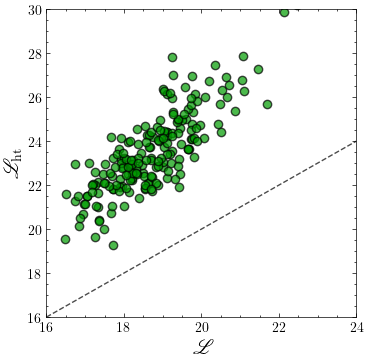

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(x_data, y_ht_data, marker='o', color=colors[1],edgecolors='black', alpha=0.7)
ax.set_xlabel(r'$\mathscr{L}$', fontsize=14)
ax.set_ylabel(r'$\mathscr{L}_{\text{ht}}$', fontsize=14)

line = range(16, 30)
ax.plot(line, line, color='black', linestyle='--', alpha=0.7)

ax.set_ylim(16, 30)
ax.set_xlim(16, 24)

plt.savefig('../figures/scatter-ht.pdf', dpi=300) 

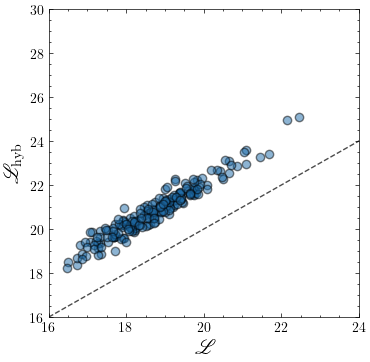

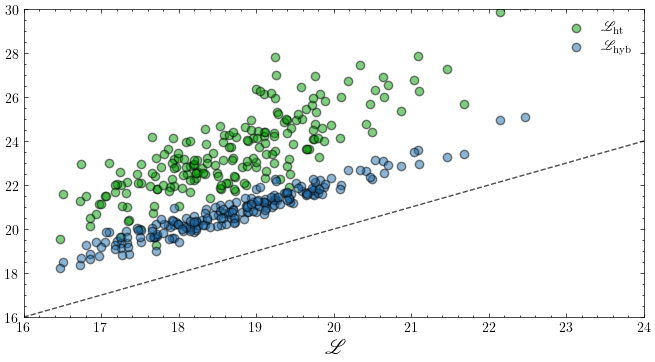

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.scatter(x_data, y_ht_data, marker='o', color=colors[1],edgecolors='black', alpha=0.5, label=r"$\mathscr{L}_{\text{ht}}$")
ax.scatter(x_data, y_hyb_data, marker='o', color=colors[0],edgecolors='black', alpha=0.5, label=r"$\mathscr{L}_{\text{hyb}}$")

ax.set_xlabel(r'$\mathscr{L}$', fontsize=14)

line = range(16, 30)
ax.plot(line, line, color='black', linestyle='--', alpha=0.7)

plt.legend()
ax.set_ylim(16, 30)
ax.set_xlim(16, 24)

plt.savefig('../figures/scatter-combined.pdf', dpi=300)